In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-adihlvhs
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pyimq: filename=pyimq-0.1-py3-none-any.whl size=26675 sha256=6386a16dd361bf9e2619d09b70655538d670f08e76812920060378783076f45a
  Stored in directory: C:\Users\mspat\AppData\Local\Temp\pip-ephem-wheel-cache-qs_f1aza\wheels\bf\a0\6a\f2575bbb691c74edd4f8783f5d9b05fa9c5fb4e25fe99f82f9
Successfully built pyimq


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-adihlvhs'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=DAPI --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing DAPI_20230206_B2-10_01.tif
Done analyzing DAPI_20230206_B2-11_01.tif
Done analyzing DAPI_20230206_B2-12_01.tif
Done analyzing DAPI_20230206_B2-13_01.tif
Done analyzing DAPI_20230206_B2-14_01.tif
Done analyzing DAPI_20230206_B2-15_01.tif
Done analyzing DAPI_20230206_B2-16_01.tif
Done analyzing DAPI_20230206_B2-1_01.tif
Done analyzing DAPI_20230206_B2-2_01.tif
Done analyzing DAPI_20230206_B2-3_01.tif
Done analyzing DAPI_20230206_B2-4_01.tif
Done analyzing DAPI_20230206_B2-5_01.tif
Done analyzing DAPI_20230206_B2-6_01.tif
Done analyzing DAPI_20230206_B2-7_01.tif
Done analyzing DAPI_20230206_B2-8_01.tif
Done analyzing DAPI_20230206_B2-9_01.tif
Done analyzing DAPI_20230206_B3-10_01.tif
Done analyzing DAPI_20230206_B3-11_01.tif
Done analyzing DAPI_20230206_B3-12_01.tif
Done analyzing DAPI_20230206_B3-13_01.tif
Done analyzing DAPI_20230206_B3-14_01.tif
Done analyzing DAPI_20230206_B3-15_01.tif
Done analyzing DAPI_20230206_B3-16_01

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
imaq_4h=pd.read_csv('DAPI/2023-02-07_PyIQ_output/19-35-33_PyIQ_analyze_out.csv')
imaq_4h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
283,DAPI\DAPI_20230206_C2-12_01.tif,2.786496,1854992.0,0.451756,119.887656,1.499296,5.247877,2.270810e+09,119.698513,-0.113395,...,0.424614,0.014769,0.985231,1.000000,0.940524,0.069262,0.543846,0.197665,0.037750,0.006472
284,DAPI\DAPI_20230206_C2-3_01.tif,1.231478,1853270.0,0.537145,118.865738,1.476880,4.983905,2.273333e+09,118.452626,0.202271,...,0.420994,0.014548,0.985452,0.949699,0.893908,0.004109,0.538185,0.199838,0.037715,0.007695
285,DAPI\DAPI_20230206_D2-8_01.tif,2.387856,1785187.0,0.400158,121.927846,1.471799,5.175884,2.273333e+09,121.416249,-0.136868,...,0.431839,0.014498,0.985502,0.986281,0.928212,0.044292,0.551650,0.199187,0.036329,0.005733
286,DAPI\DAPI_20230206_D4-15_01.tif,2.919065,1886115.0,0.463396,119.256970,1.462763,4.794586,2.273333e+09,118.975759,-0.004174,...,0.422380,0.014409,0.985591,0.913624,0.997811,0.091936,0.540562,0.197545,0.038383,0.006639
287,DAPI\DAPI_20230206_B4-15_01.tif,3.039203,1935534.0,0.461590,117.072422,1.362616,5.021636,2.273333e+09,116.677420,-0.017350,...,0.414643,0.013423,0.986577,0.956889,0.990900,0.039012,0.530120,0.192413,0.039389,0.006613


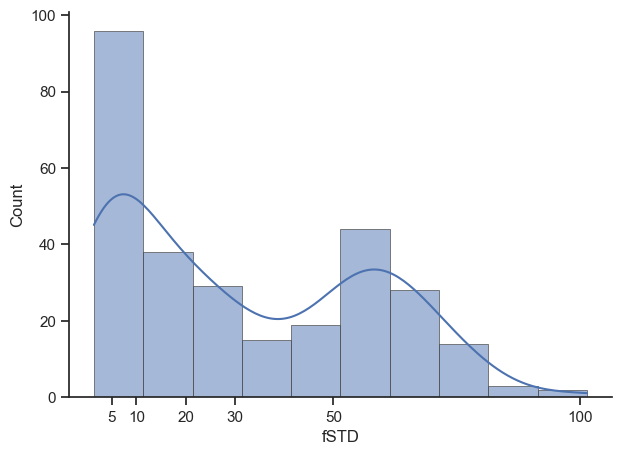

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_4h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5, 10, 20, 30, 50, 100])

In [7]:
imaq_4h_sel=imaq_4h[imaq_4h['fSTD']<3]

In [8]:
imaq_4h_sel.Filename.count()

33

In [10]:
imaq_4h_sel.to_csv('DAPI_20230206_CHOK1_HeLa_4h_filterOut.csv', sep=";") 